In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('international-airline-passengers.csv',usecols = [1])

In [4]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
values = df.values.astype('float')
values

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [10]:
train_size = int(values.shape[0]*0.67)
train_size

96

In [11]:
test_size = values.shape[0] - train_size
test_size

48

In [14]:
train = values[0:train_size]
test = values[0:test_size]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [18]:
import numpy as np


In [19]:
def createDataset(data,k):
    dataX,dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i+k,0]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [24]:
look_back = 12
testX,testY = createDataset(test,look_back)
trainX,trainY = createDataset(train,look_back)

In [28]:
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [30]:
from keras.layers import SimpleRNN,Dense
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.fit(trainX,trainY,epochs = 10,batch_size = 1)

Epoch 1/10
84/84 [==============================] - 2s 5ms/step - loss: 0.1440
Epoch 2/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0180
Epoch 3/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 4/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0122
Epoch 5/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 6/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 7/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 8/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 9/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 10/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0095


In [33]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

3/3 [==============================] - 0s 6ms/step


In [34]:
trainTrue = scaler.inverse_transform([trainY]).ravel()
testTrue = scaler.inverse_transform([testY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

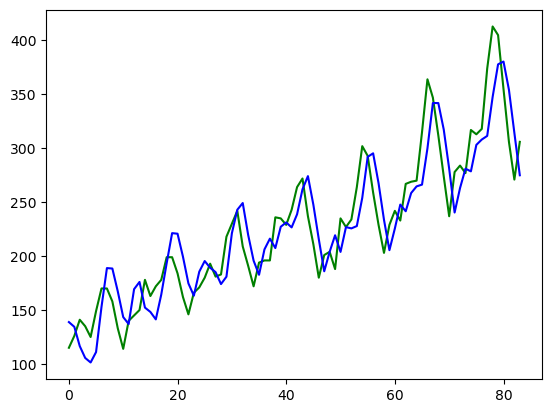

In [36]:
from matplotlib import pyplot as plt

plt.plot(trainTrue,c = 'g')
plt.plot(trainPredict, c = 'b')

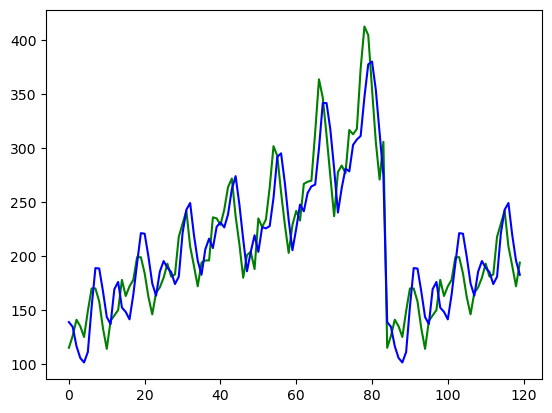

In [38]:
combinedPredicted = np.concatenate((trainPredict,testPredict))
combinedTrue = np.concatenate((trainTrue,testTrue))

plt.plot(combinedTrue,c = 'g')
plt.plot(combinedPredicted, c = 'b')